In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob

from astropy.convolution import convolve, Box1DKernel

import utils as ut

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


(737979.5993055556, 737979.6003472222)

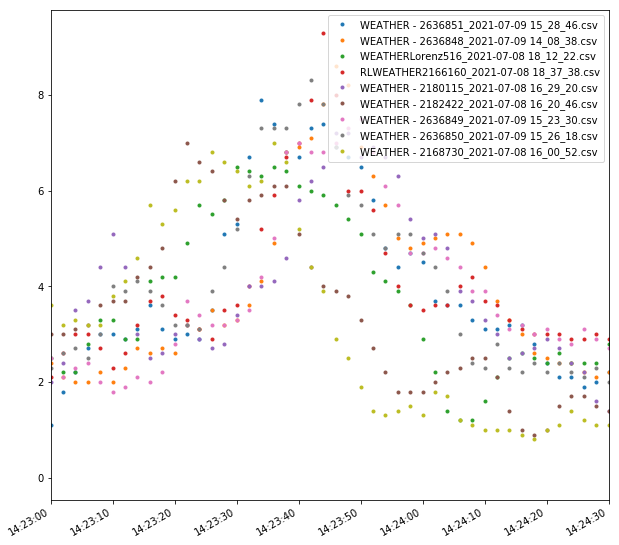

In [14]:
# plot all windspeed time-series
fig, ax = ut.plot_kestrel_timeseries('Wind_Speed')
ax.set_xlim(pd.Timestamp('2021-07-08 14:23'), pd.Timestamp('2021-07-08 14:24:30'))
# fig.savefig("Windspeed_Timeseries.png", dpi=500, bbox_inches="tight")

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


(737979.5972222222, 737979.6041666666)

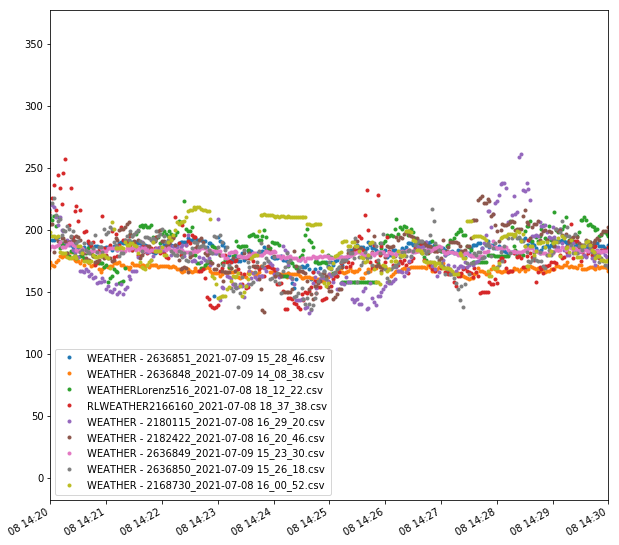

In [24]:
# plot all wind direction time-series
fig, ax = ut.plot_kestrel_timeseries('Mag_Dir')
ax.set_xlim(pd.Timestamp('2021-07-08 14:20'), pd.Timestamp('2021-07-08 14:30'))
# fig.savefig("Winddirection_Timeseries.png", dpi=500, bbox_inches="tight")

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


(737979.5972222222, 737979.6041666666)

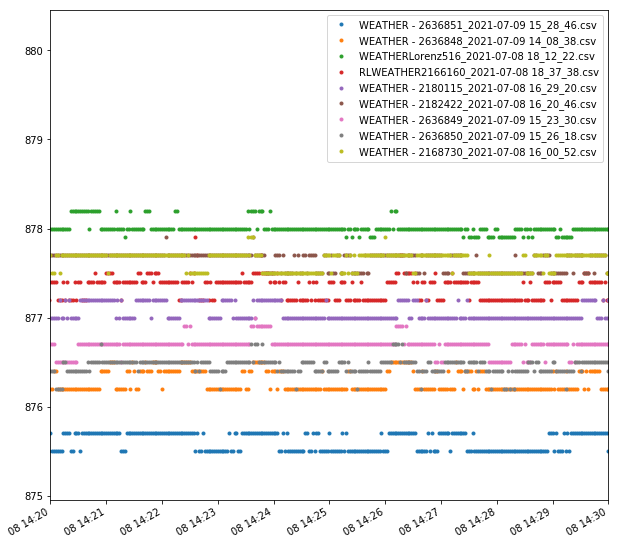

In [13]:
# plot all wind direction time-series
fig, ax = ut.plot_kestrel_timeseries('Baro')
ax.set_xlim(pd.Timestamp('2021-07-08 14:20'), pd.Timestamp('2021-07-08 14:30'))
# fig.savefig("Pressure_Timeseries.png", dpi=500, bbox_inches="tight")

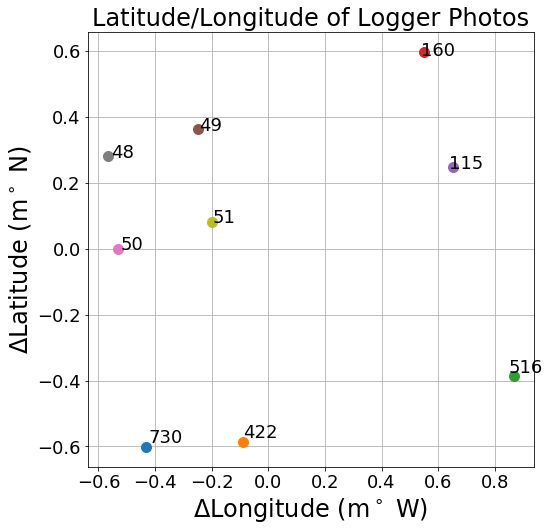

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

delta_latitudes = np.array([])
delta_longitudes = np.array([])

for logger in ut.logger_locations.keys():
    if(logger is not 'mean'):
        
        x = (ut.logger_locations[logger][1] - ut.logger_locations['mean'][1])
        y = (ut.logger_locations[logger][0] - ut.logger_locations['mean'][0])

        delta_latitudes = np.append(delta_latitudes, y)
        delta_longitudes = np.append(delta_longitudes, x)
        
        ax.plot(x*1000., y*1000., 
                marker='o', markersize=10, ls='')
        
        ax.text(x.value*1000.*0.98, y.value*1000.*0.98, logger, fontsize=18)
    
plt.title("Latitude/Longitude of Logger Photos", fontsize=24)

ax.grid(True)
ax.set_xlabel(r'$\Delta$Longitude (m$^\circ$ W)', fontsize=24)
ax.set_ylabel(r'$\Delta$Latitude (m$^\circ$ N)', fontsize=24)
ax.tick_params(labelsize=18)
fig.savefig("logger_locations.png", dpi=500, bbox_inches="tight")

In [97]:
# Experimenting with returning dataframe within time range
data = ut.read_kestrel_data(logger_name="49")
print(data.between_time('14:20', '14:25'))

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


                     Temp  Wet_Bulb_Temp  Rel_Hum   Baro  Altitude Station_P  \
2021-07-08 14:20:00  32.5           13.9     11.2  876.7      1202  b'876.7'   
2021-07-08 14:20:02  32.4           13.8     11.2  876.7      1203  b'876.7'   
2021-07-08 14:20:04  32.4           13.8     11.2  876.7      1203  b'876.6'   
2021-07-08 14:20:06  32.3           13.7     11.2  876.5      1203  b'876.6'   
2021-07-08 14:20:08  32.4           13.8     11.2  876.5      1204  b'876.6'   
2021-07-08 14:20:10  32.3           13.7     11.2  876.5      1203  b'876.6'   
2021-07-08 14:20:12  32.4           13.8     11.2  876.5      1204  b'876.6'   
2021-07-08 14:20:14  32.5           13.9     11.2  876.5      1203  b'876.6'   
2021-07-08 14:20:16  32.7           14.0     11.3  876.5      1204  b'876.6'   
2021-07-08 14:20:18  33.0           14.2     11.4  876.5      1203  b'876.6'   
2021-07-08 14:20:20  33.1           14.3     11.5  876.5      1204  b'876.6'   
2021-07-08 14:20:22  33.0           14.3

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


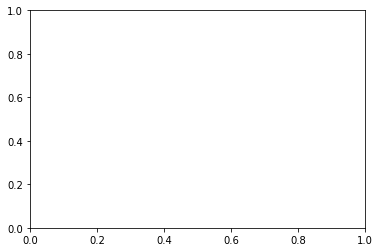

In [36]:
# Make datasets for wind vector animation

start_time = '14:23'
end_time = '14:26'

num_points = 10
box1Dkernel = Box1DKernel(num_points)

# x coordinates for plot - longitudes
x = np.array([(ut.logger_locations[ut.logger_names[0]][1] - ut.logger_locations['mean'][1]).value])
# y coordinates for plot - latitudes
y = np.array([(ut.logger_locations[ut.logger_names[0]][0] - ut.logger_locations['mean'][0]).value])

data = ut.read_kestrel_data(logger_name=ut.logger_names[0])
times = data.between_time(start_time, end_time).index.strftime('%H:%M:%S')

windspeed = data['Wind_Speed'].between_time(start_time, end_time)
winddirection = data['True_Dir'].between_time(start_time, end_time)*np.pi/180.

# northward wind velocity component
V = -windspeed*np.cos(winddirection)
# eastward wind velocity component
U = -windspeed*np.sin(winddirection)

U = convolve(U, box1Dkernel)
V = convolve(V, box1Dkernel)

dP = data['Baro'].between_time(start_time, end_time)
dP = np.abs(np.min(dP) - dP)
dP = convolve(dP, box1Dkernel)

# For some reason, some of the data files have more data points in the same time range than others...
max_ind = len(dP)

fig = plt.figure()
ax = fig.add_subplot(111)

for logger_name in ut.logger_names[1:]:
    data = ut.read_kestrel_data(logger_name=logger_name)
    
    x = np.append(x, (ut.logger_locations[logger_name][1] - ut.logger_locations['mean'][1]).value)
    y = np.append(y, (ut.logger_locations[logger_name][0] - ut.logger_locations['mean'][0]).value)
    
    windspeed = data['Wind_Speed'].between_time(start_time, end_time)[0:max_ind]
    # convert from degrees to radians
    winddirection = data['True_Dir'].between_time(start_time, end_time)[0:max_ind]*np.pi/180.
    
    delta_pressure = data['Baro'].between_time(start_time, end_time)[0:max_ind]
    delta_pressure = np.abs(np.min(delta_pressure) - delta_pressure)
    
    # 2021 Jul 11 - Boxcar filter the pressure data
    delta_pressure = convolve(delta_pressure, box1Dkernel)

    # Just checking that everything seems to do what I want
#     ax.quiver((ut.logger_locations[logger_name][1] - ut.logger_locations['mean'][1]).value*1000.,
#               (ut.logger_locations[logger_name][0] - ut.logger_locations['mean'][0]).value*1000., 
#               (windspeed*np.cos(winddirection))[0], 
#               (windspeed*np.sin(winddirection))[0])

    U = np.vstack((U, convolve(-windspeed*np.sin(winddirection), box1Dkernel)))
    V = np.vstack((V, convolve(-windspeed*np.cos(winddirection), box1Dkernel)))
    
    dP = np.vstack((dP, delta_pressure))
    
# Subtract out the mean wind
# U -= np.mean(U)
# V -= np.mean(V)


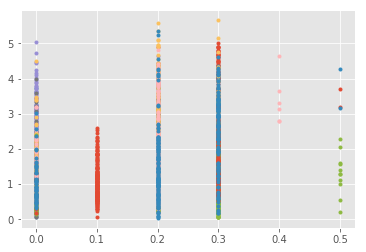

In [118]:
for i in range(len(dP[:,0])):
    plt.plot(dP[i,:], np.sqrt(U[i,:]**2 + V[i,:]**2), marker='.', ls='')

0.0 0.08500000000001931 0.3799999999999728


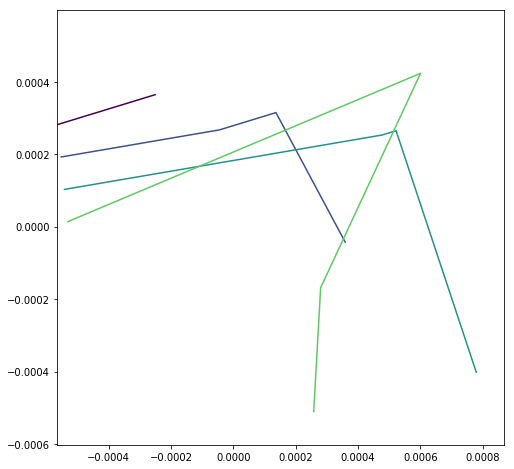

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ct = ax.contour(x.reshape(3, 3), y.reshape(3, 3), dP[:,0].reshape(3, 3), levels=3)
print(np.min(dP), np.median(dP), np.max(dP))

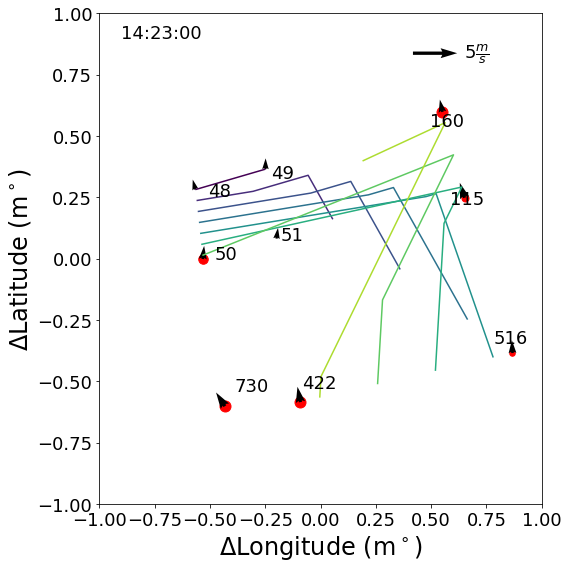

In [45]:
# Example animations using matplotlib's FuncAnimation
# Ken Hughes. 18 June 2016.

# For more detail, see
# https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

# Examples include
#    - line plot
#    - pcolor plot
#    - scatter plot
#    - contour plot
#    - quiver plot
#    - plot with changing labels

from matplotlib.animation import FuncAnimation

# Set up the figure and axis

fig = plt.figure(figsize=(8,8))
ax = fig.gca()

def animate(i):
    ax.cla()
    qax = ax.quiver(x*1000., y*1000., U[..., 0], V[..., 0], scale=50)
    qk = ax.quiverkey(qax, 0.8, 0.9, 5, r'$5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure', fontproperties={"size": 18})
    
    ct = ax.contour(x.reshape(3, 3)*1000., y.reshape(3, 3)*1000., dP[:,i].reshape(3, 3))
    
    ax.set_xlabel(r'$\Delta$Longitude (m$^\circ$)', fontsize=24)
    ax.set_ylabel(r'$\Delta$Latitude (m$^\circ$)', fontsize=24)
    ax.tick_params(labelsize=18)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    
    for j in range(len(x)):
        ax.plot(x[j]*1000., y[j]*1000., ls='', marker='o', markersize=dP[j,i]*100, zorder=-1, color='r')
        ax.text(x[j]*1000.*0.9, y[j]*1000.*0.9, ut.logger_names[j], fontsize=18)

    qax.set_UVC(U[..., i], V[..., i])
    
    ax.text(-0.9, 0.9, times[i], fontsize=18)
    
    plt.tight_layout()
    
# ----------------------------------------------------------------------------
# Save the animation
anim = FuncAnimation(fig, animate, interval=200, frames=len(U[0,:])-1)

anim.save('vortex visualization.mp4', writer='ffmpeg')